<a href="https://colab.research.google.com/github/bilal176/CV/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTS
import os,urllib.request


# PROVIDING DOWNLOAD DIRECTORY
datapath = '../../Data/MNISTData/'  

# CREATING DOWNLOAD DIRECTORY
if not os.path.exists(datapath):
    os.makedirs(datapath)

# URLS TO DOWNLOAD FROM
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]   # GET FILENAME
    
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')  # CHECK IF FILE EXISTS
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename) # DOWNLOAD FILE
     
print('All files are available')

All files are available


In [ ]:
import os,gzip,shutil

# PROVIDING DOWNLOAD DIRECTORY HERE
datapath = '../../Data/MNISTData/'  

# LISTING ALL ARCHIVES IN THE DIRECTORY
files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')

# OPTIONAL REMOVE THE ARCHIVES
for file in files:
    print('Removing ',file)
    os.remove(datapath+file)
print ('All archives removed')

Extracting  train-images-idx3-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extracting  t10k-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extraction Complete
Removing  train-images-idx3-ubyte.gz
Removing  t10k-labels-idx1-ubyte.gz
Removing  t10k-images-idx3-ubyte.gz
Removing  train-labels-idx1-ubyte.gz
All archives removed


In [ ]:
import os,codecs,numpy

# PROVIDING DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '../../Data/MNISTData/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  train-images-idx3-ubyte
Reading  t10k-images-idx3-ubyte
Reading  train-labels-idx1-ubyte
Reading  t10k-labels-idx1-ubyte


In [ ]:
import os
from skimage.io import imsave
datapath = '../../Data/MNISTData/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        if not os.path.exists(datapath+set+'/'+str(label)+'/'):    # IF DIRECTORIES DO NOT EXIST THEN 
            os.makedirs (datapath+set+'/'+str(label)+'/')       # CREATE TRAIN/TEST DIRECTORY AND CLASS SPECIFIC SUBDIRECTORY
        filenumber = len(os.listdir(datapath+set+'/'+str(label)+'/'))  # NUMBER OF FILES IN THE DIRECTORY FOR NAMING THE FILE
        imsave(datapath+set+'/'+str(label)+'/%05d.png'%(filenumber),image)  # SAVE THE IMAGE WITH PROPER NAME

Streaming output truncated to the last 5000 lines.
test 5000
test 5001
test 5002
test 5003
test 5004
test 5005
test 5006
test 5007
test 5008
test 5009
test 5010
test 5011
test 5012
test 5013
test 5014
test 5015
test 5016
test 5017
test 5018
test 5019
test 5020
test 5021
test 5022
test 5023
test 5024
test 5025
test 5026
test 5027
test 5028
test 5029
test 5030
test 5031
test 5032
test 5033
test 5034
test 5035
test 5036
test 5037
test 5038
test 5039
test 5040
test 5041
test 5042
test 5043
test 5044
test 5045
test 5046
test 5047
test 5048
test 5049
test 5050
test 5051
test 5052
test 5053
test 5054
test 5055
test 5056
test 5057
test 5058
test 5059
test 5060
test 5061
test 5062
test 5063
test 5064
test 5065
test 5066
test 5067
test 5068
test 5069
test 5070
test 5071
test 5072
test 5073
test 5074
test 5075
test 5076
test 5077
test 5078
test 5079
test 5080
test 5081
test 5082
test 5083
test 5084
test 5085
test 5086
test 5087
test 5088
test 5089
test 5090
test 5091
test 5092
test 5093
test 5094

In [ ]:
import pickle

datapath = '../../Data/MNISTData/'

# DUMPING THE DICTIONARY INTO A PICKLE 
with open(datapath+'MNISTData.pkl', 'wb') as fp :
    pickle.dump(data_dict, fp)

# LOADING THE DICTIONARY FROM A PICKLE
with open(datapath+'MNISTData.pkl', 'rb') as fp :
    new_dict = pickle.load(fp)

In [ ]:
data_dict['test_images'].shape

(10000, 28, 28)

In [ ]:
data_dict['train_images'].shape

(60000, 28, 28)

In [ ]:
data_dict['test_images'][0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(new_dict.keys())

dict_keys(['train_images', 'test_images', 'train_labels', 'test_labels'])


In [ ]:
# code for k-means clustring

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 
img=load_digits()

(1797, 64)


Text(0.5, 1.0, '5')

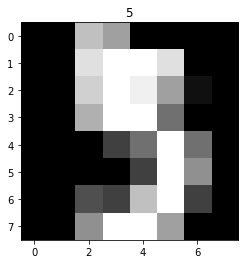

In [ ]:
print(img["data"].shape) 
img_digits=img["data"] 
target=img["target"] 
plt.imshow(img_digits[5].reshape((8,8)),cmap="gray",) 
plt.title(label=target[5])

In [ ]:
df_img=pd.DataFrame() 
for i in range(64): 
    df_img[f"Pixel{i}"]=img_digits[:,i] 

In [ ]:
df_img

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel54,Pixel55,Pixel56,Pixel57,Pixel58,Pixel59,Pixel60,Pixel61,Pixel62,Pixel63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler() 
df_img_scaled=scaler.fit_transform(df_img)

In [ ]:
from sklearn.cluster import KMeans 
elbow={"inertia":[],"clusters":[]}

for i in range(2,15): 
    model=KMeans(i) 
    elbow["clusters"].append(i) 
    model.fit(df_img_scaled) 
    elbow["inertia"].append(model.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

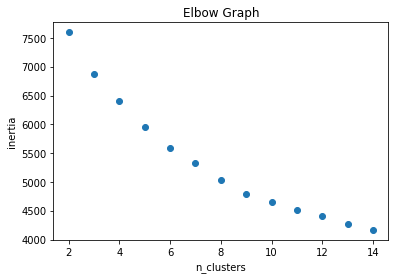

In [ ]:
plt.scatter(x=elbow["clusters"],y=elbow["inertia"]) 
plt.xlabel("n_clusters") 
plt.ylabel("inertia") 
plt.title("Elbow Graph")

In [ ]:
model_10=KMeans(10) 
model_10.fit(df_img_scaled)

KMeans(n_clusters=10)

In [ ]:
from sklearn.manifold import TSNE 

tsne=TSNE(2) 
arr=tsne.fit_transform(df_img_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


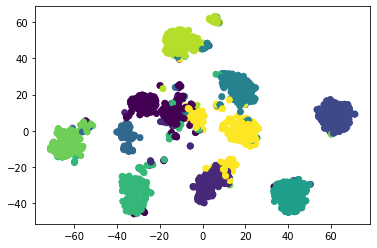

In [ ]:
plt.scatter(arr[:,0],arr[:,1],c=model_10.labels_)